In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/birds-20-species-image-classification/images to predict/6.jpg
/kaggle/input/birds-20-species-image-classification/images to predict/5.jpg
/kaggle/input/birds-20-species-image-classification/images to predict/1.jpg
/kaggle/input/birds-20-species-image-classification/images to predict/4.jpg
/kaggle/input/birds-20-species-image-classification/images to predict/3.jpg
/kaggle/input/birds-20-species-image-classification/images to predict/2.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN KESTREL/5.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN KESTREL/1.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN KESTREL/4.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN KESTREL/3.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN KESTREL/2.jpg
/kaggle/input/birds-20-species-image-classification/valid/AMERICAN GOLDFINCH/5.jpg
/kaggle/input/birds-20-species-image-classification/vali

In [4]:
import tensorflow as tf

2024-02-26 09:41:15.119026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 09:41:15.119206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 09:41:15.290094: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
dataset_dir = "/kaggle/input/birds-20-species-image-classification/train"

# Define parameters for loading the dataset
batch_size = 32
img_size = (224, 224)
seed = 42

# Create the TensorFlow dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

Found 3208 files belonging to 20 classes.
Using 2567 files for training.
Found 3208 files belonging to 20 classes.
Using 641 files for validation.


In [6]:
# Print class names
class_names = train_dataset.class_names
print("Class names:", class_names)


Class names: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']


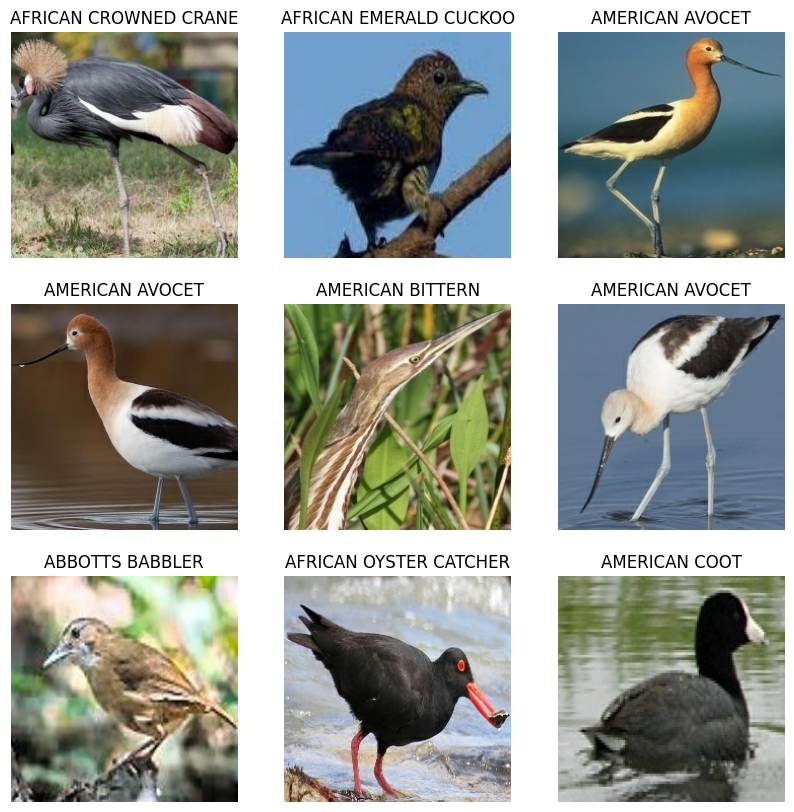

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [8]:
from tensorflow.keras import layers

# Define the model
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(324, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(524, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30
)


Epoch 1/30


I0000 00:00:1708940496.992218     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


81/81 [==============================] - 15s 85ms/step - loss: 2.9192 - accuracy: 0.0830 - val_loss: 2.6725 - val_accuracy: 0.1342
Epoch 2/30
81/81 [==============================] - 5s 61ms/step - loss: 2.3954 - accuracy: 0.2411 - val_loss: 2.2556 - val_accuracy: 0.2808
Epoch 3/30
81/81 [==============================] - 5s 61ms/step - loss: 1.9998 - accuracy: 0.3899 - val_loss: 1.9537 - val_accuracy: 0.4228
Epoch 4/30
81/81 [==============================] - 5s 64ms/step - loss: 1.5181 - accuracy: 0.5224 - val_loss: 1.5126 - val_accuracy: 0.5413
Epoch 5/30
81/81 [==============================] - 5s 61ms/step - loss: 1.1202 - accuracy: 0.6295 - val_loss: 1.5455 - val_accuracy: 0.5445
Epoch 6/30
81/81 [==============================] - 5s 61ms/step - loss: 0.8718 - accuracy: 0.7285 - val_loss: 1.4217 - val_accuracy: 0.5647
Epoch 7/30
81/81 [==============================] - 5s 61ms/step - loss: 0.6374 - accuracy: 0.7908 - val_loss: 1.4180 - val_accuracy: 0.6381
Epoch 8/30
81/81 [=====

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the ResNet50 model pre-trained on ImageNet without the top classification layer
resnet50_base = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Freeze the weights of the pre-trained layers
for layer in resnet50_base.layers:
    layer.trainable = False

# Define the model
resnet50 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    resnet50_base,
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # Output layer with number of classes
])

# Compile the model
resnet50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = resnet50.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
81/81 [==============================] - 21s 174ms/step - loss: 3.0794 - accuracy: 0.0771 - val_loss: 2.9113 - val_accuracy: 0.0983
Epoch 2/10
81/81 [==============================] - 10s 127ms/step - loss: 2.8839 - accuracy: 0.0915 - val_loss: 2.8439 - val_accuracy: 0.1014
Epoch 3/10
81/81 [==============================] - 10s 127ms/step - loss: 2.7616 - accuracy: 0.1293 - val_loss: 2.6991 - val_accuracy: 0.1544
Epoch 4/10
81/81 [==============================] - 10s 126ms/step - loss: 2.6104 - accuracy: 0.1847 - val_loss: 2.6042 - val_accuracy: 0.1747
Epoch 5/10
81/81 [==============================] - 10s 125ms/step - loss: 2.5355 - accuracy: 0.2065 - val_loss: 2.4811 - val_accuracy: 0.2075
Epoch 6/10
32/81 [==========>...................] - ETA: 4s - loss: 2.5122 - accuracy: 0.2178

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
# Save the model to disk
model.save("bird_species_classification_model.h5")


In [ ]:
import gradio as gr

# Function to make predictions
def classify_image(image):
  # Preprocess the image
  img = tf.image.resize(image, (224, 224))
  img = tf.expand_dims(img, 0)  # Add batch dimension
  # Make prediction
  prediction = model.predict(img)
  predicted_class = class_names[prediction.argmax()]
  return predicted_class

# Gradio interface
image = gr.components.Image()  # Remove the `shape` argument
label = gr.components.Label()

# Create interface
gr.Interface(classify_image, image, label,
             title="Bird Species Classification",
             description="Upload an image of a bird to classify its species.").launch()
